In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\Kagel_Bynary_prediction_Poisonus Mushrooms\mushroom\data\raw\train.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.shape

(3116945, 22)

In the firs EDA. I found that the columns: id, cap-color, spore-print-color, habitat . Are not relevant features correlation to the column -class-

In [5]:
df = data.copy()

In [6]:
del df['id']
del df['cap-color']
del df['spore-print-color']
del df['habitat']

In [7]:
df.shape

(3116945, 18)

In [30]:
df1 = df.copy()

In [9]:
columnas_categoricas = df1.select_dtypes(include=['object','category']).columns.tolist()

In [31]:
#Values less than 1000 are filtered
for col in columnas_categoricas:
    v_counts = df1[col].value_counts()
    v_remplazar = v_counts[v_counts < 1000].index
    df1[col] = df1[col].replace(v_remplazar, 'un')

In [11]:
df1.shape

(3116945, 18)

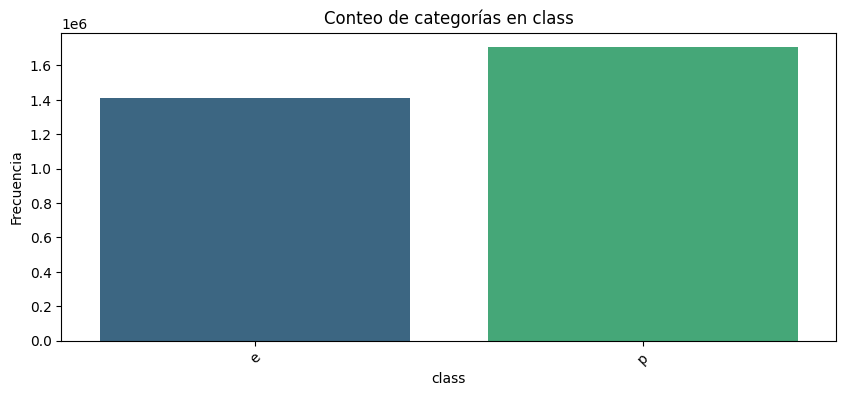

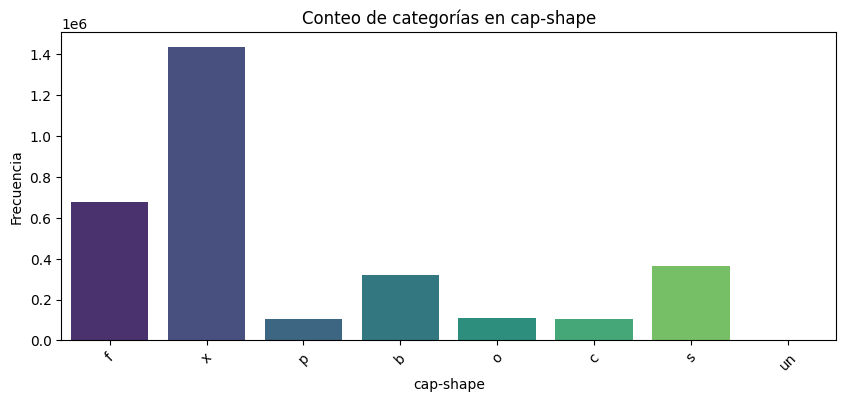

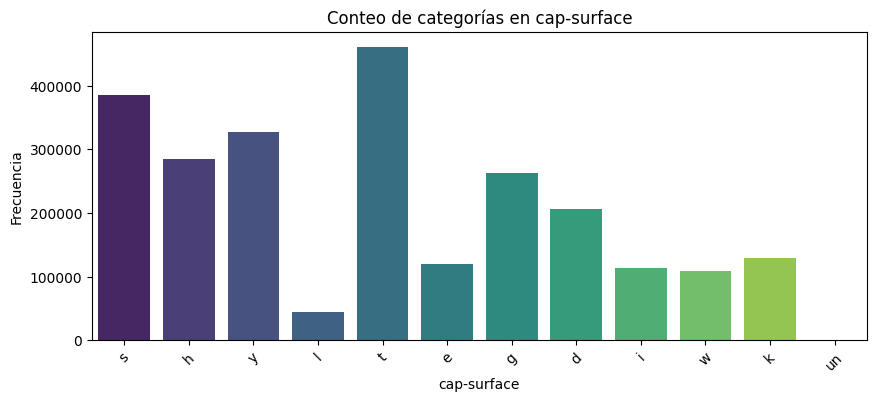

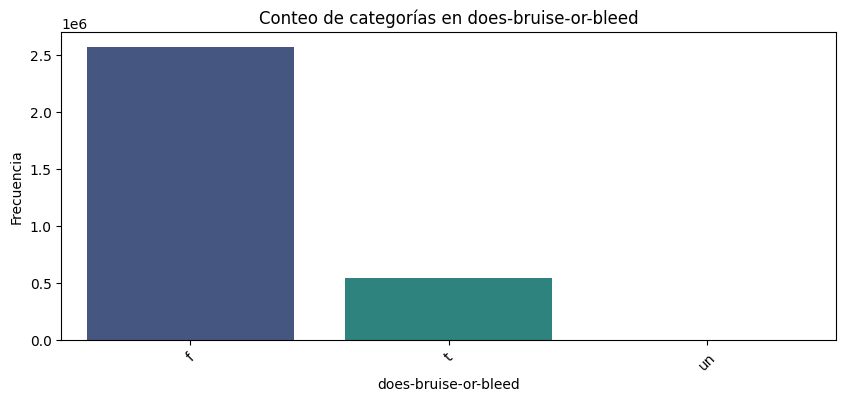

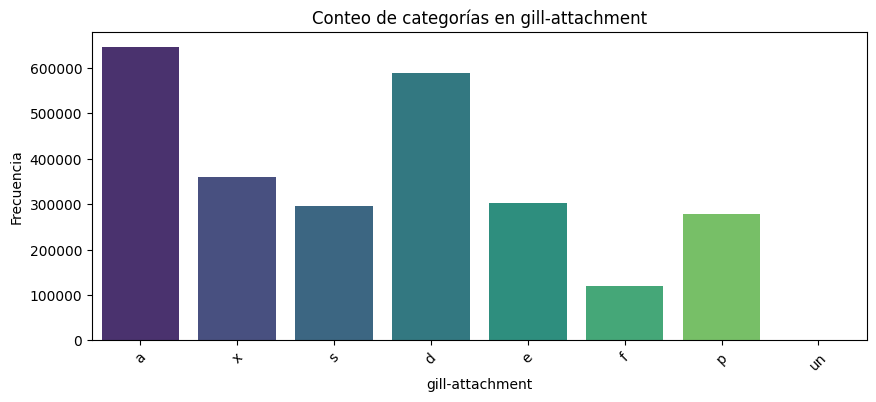

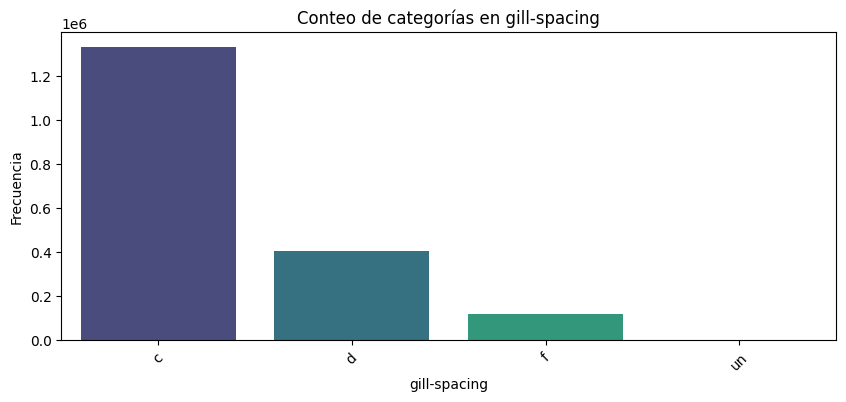

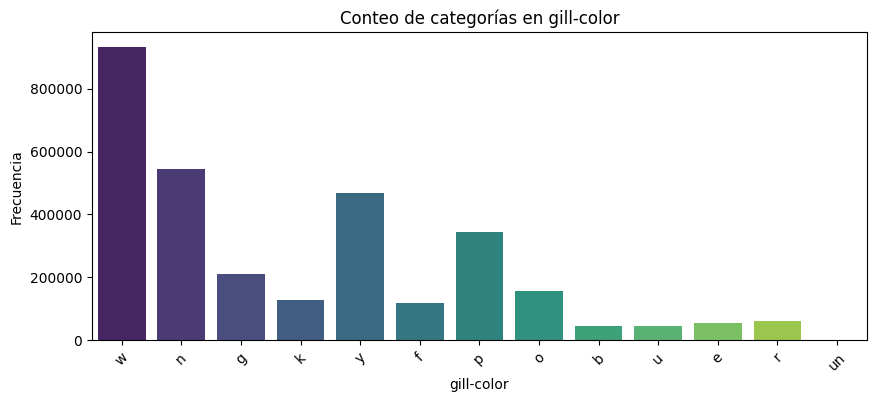

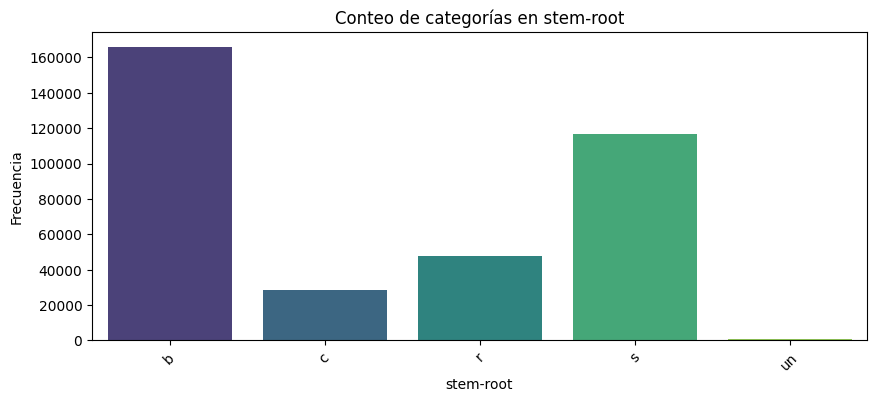

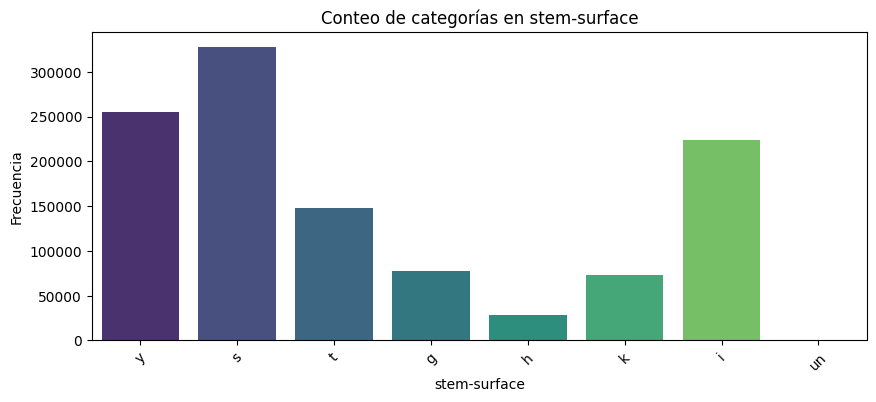

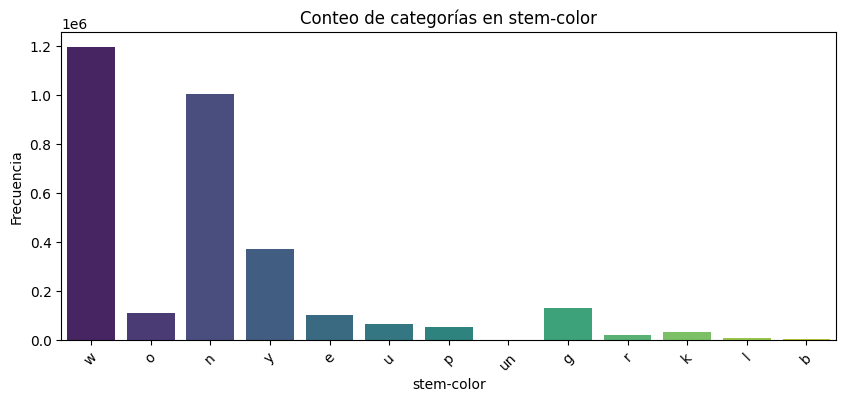

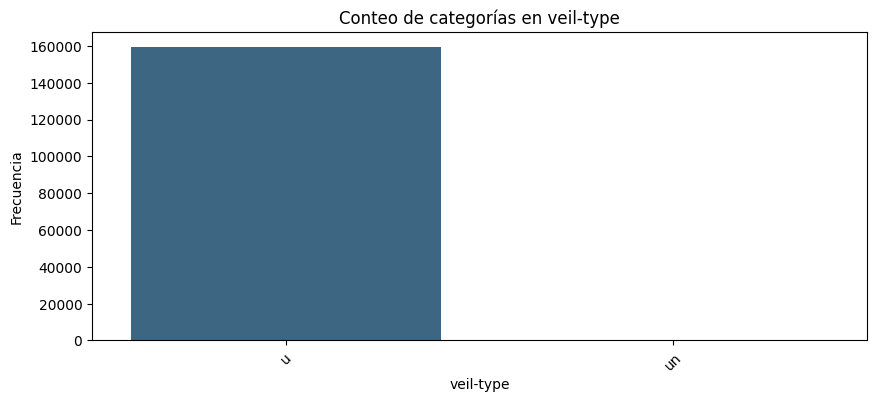

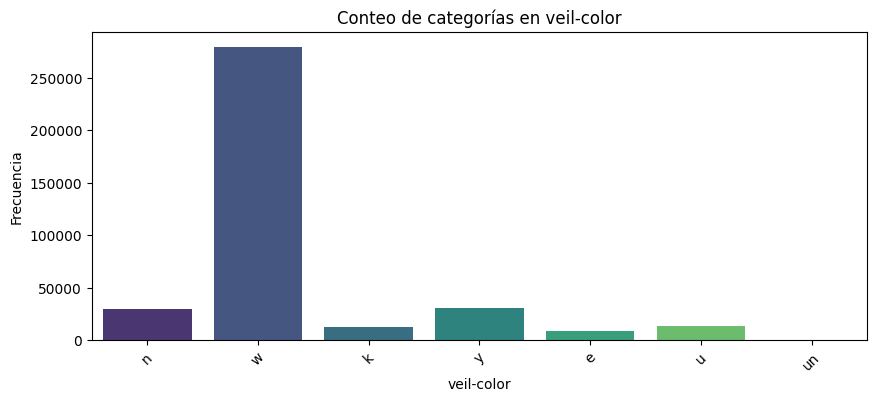

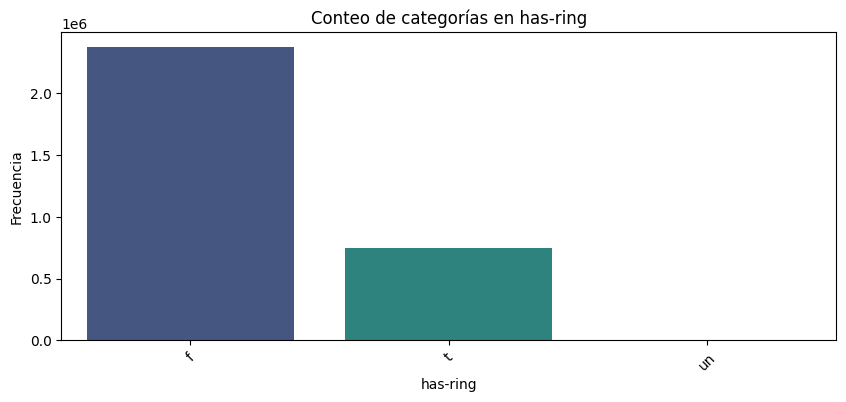

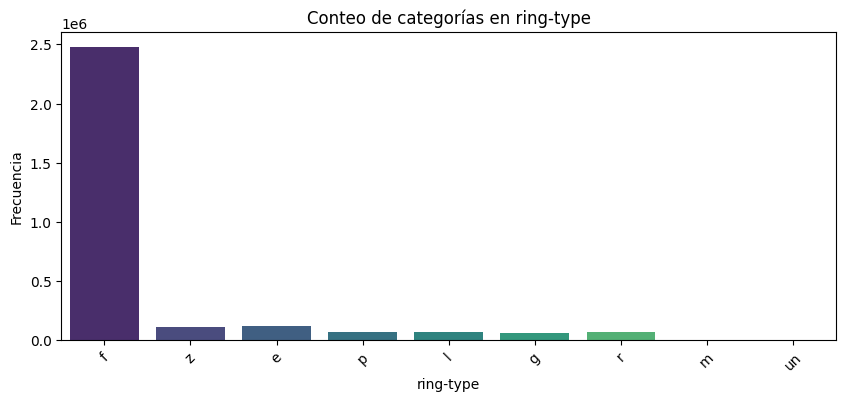

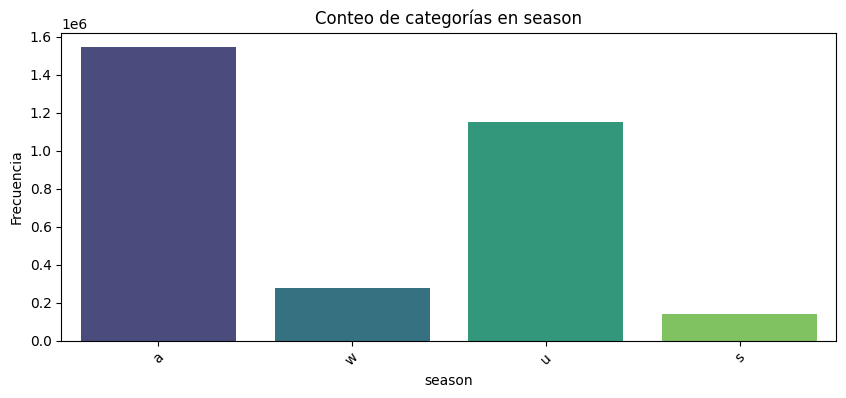

In [12]:
for col in columnas_categoricas:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df1, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Conteo de categorías en {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
    plt.show()

In [19]:
df1.value_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-spacing          object 
 7   gill-color            object 
 8   stem-height           float64
 9   stem-width            float64
 10  stem-root             object 
 11  stem-surface          object 
 12  stem-color            object 
 13  veil-type             object 
 14  veil-color            object 
 15  has-ring              object 
 16  ring-type             object 
 17  season                object 
dtypes: float64(3), object(15)
memory usage: 428.0+ MB


In [20]:
nan_counts = df1.isna().sum()

In [21]:
print(nan_counts)

class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
season                        0
dtype: int64


In [32]:
#Fill na values
for col in columnas_categoricas:
    df1[col] = df1[col].fillna('cero')

In [33]:
col_discretas = ['stem-height', 'stem-width', 'cap-diameter']

In [34]:
for col in col_discretas:
    df1[col] = df1[col].fillna(0)

In [35]:
nan_counts = df1.isna().sum()
print(nan_counts)

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
season                  0
dtype: int64


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-spacing          object 
 7   gill-color            object 
 8   stem-height           float64
 9   stem-width            float64
 10  stem-root             object 
 11  stem-surface          object 
 12  stem-color            object 
 13  veil-type             object 
 14  veil-color            object 
 15  has-ring              object 
 16  ring-type             object 
 17  season                object 
dtypes: float64(3), object(15)
memory usage: 428.0+ MB


In [28]:
path = r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\Kagel_Bynary_prediction_Poisonus Mushrooms\mushroom\data\clean\clean_3.parquet'

In [37]:
df1.to_parquet(path)